In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
import time

import pyspark

from sklearn.metrics import roc_auc_score

In [2]:
ls

'AML Class code'/                     grid_search_results_nn.csv
'AML-Complete Code.ipynb'             grid_search_results_xgb.csv
'Credit Risk Project.docx'*           Read.ipynb
 DataPrepFull_Modelling-Copy1.ipynb   sample_submission.csv*
 DataPrepFull_Modelling.ipynb         test_data.csv*
 dev.csv/                             train_data.csv*
 Exploration.ipynb                    train_labels.csv*
 feature_importance_xgb_m1.xlsx       Untitled1.ipynb
 feature_importance_xgb_m2.xlsx       Untitled.ipynb
 grid_search_results.csv


In [3]:
# Read the dev sample
csv_folder_path = '/home/flame/Desktop/AML Project/amex-default-prediction/dev.csv/'

# read the file using pandas
df = pd.read_csv('dev.csv/part-00000-ee748d50-0c69-46e0-bdfd-03dac1fb4272-c000.csv')

In [4]:
# set options to see the dataframe entirely
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)

In [5]:
df.head(5)

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008

In [6]:
df.shape

(1103628, 191)

In [7]:
df['customer_ID'].nunique()

91633

In [8]:
# Re Organize the dataframe.
fixed_columns = ['customer_ID', 'S_2', 'target']    # since s_2 is the date column
other_columns = sorted([col for col in df.columns if col not in fixed_columns])

new_column_order = fixed_columns + other_columns
df = df[new_column_order]

In [9]:
print(list(df.columns))

['customer_ID', 'S_2', 'target', 'B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_2', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_3', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_39', 'B_4', 'B_40', 'B_41', 'B_42', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145', 'D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65', 'D_66', 'D_68', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_7

In [10]:
from collections import Counter

initial_chars = [col[0] for col in df.columns if col[0].isalpha()]
initial_char_counts = Counter(initial_chars)

initial_char_counts_df = pd.DataFrame(list(initial_char_counts.items()), columns=['Initial_Char', 'Count'])

mapping = {
    'c': 'Customer ID',
    's': 'Spend Variables',
    't': 'Target',
    'B': 'Balance Variables',
    'D': 'Delinquency Variables',
    'P': 'Payment Variables',
    'R': 'Risk Variables',
}

initial_char_counts_df['Description'] = initial_char_counts_df['Initial_Char'].map(lambda x: mapping.get(x, 'Other'))
initial_char_counts_df

,Initial_Char,Count,Description
0,c,1,Customer ID
1,S,22,Other
2,t,1,Target
3,B,40,Balance Variables
4,D,96,Delinquency Variables
5,P,3,Payment Variables
6,R,28,Risk Variables


### Customer History Buckets

In [11]:
customer_counts = df['customer_ID'].value_counts()

counts_df = pd.DataFrame(customer_counts).reset_index()
counts_df.columns = ['c_id', 'counts']

# grouping by counts to calculate number of customers
count_summary = counts_df.groupby('counts')['c_id'].nunique().reset_index()

# renaming the columns
count_summary.columns = ['count_bucket', 'num_customers']

# show dataframe
count_summary

,count_bucket,num_customers
0,1,1035
1,2,1208
2,3,1215
3,4,955
4,5,936
5,6,1075
6,7,1034
7,8,1247
8,9,1268
9,10,1342


#### Drop Customers with Less than 3 months of data

In [12]:
customer_counts = df['customer_ID'].value_counts()

# Filter customer_counts to get IDs of customers who appear 3 times or more
customers_to_keep = customer_counts[customer_counts >= 3].index

# Filter the original DataFrame to keep only rows with these customer IDs
filtered_df = df[df['customer_ID'].isin(customers_to_keep)]



customer_counts = filtered_df['customer_ID'].value_counts()

counts_df = pd.DataFrame(customer_counts).reset_index()
counts_df.columns = ['c_id', 'counts']

# grouping by counts to calculate number of customers
count_summary = counts_df.groupby('counts')['c_id'].nunique().reset_index()

# renaming the columns
count_summary.columns = ['count_bucket', 'num_customers']

# show dataframe
count_summary

,count_bucket,num_customers
0,3,1215
1,4,955
2,5,936
3,6,1075
4,7,1034
5,8,1247
6,9,1268
7,10,1342
8,11,1232
9,12,2134


In [13]:
df = filtered_df

# Null Value Check

In [14]:
# See if there any null values
v1 = df.isnull().sum()
v2 = ((df.isnull().sum()/len(df))*100).round(5)

[f'{percent:.2f}%' for percent in v2]

null_df = pd.DataFrame({'Null Value Count':v1,
                       'Null Value Percent':[f'{percent:.2f}%' for percent in v2]})
null_df.sort_values(by='Null Value Count', ascending=False)

,Null Value Count,Null Value Percent
D_87,1099342,99.92%
D_88,1099021,99.89%
D_108,1094295,99.47%
D_110,1093996,99.44%
D_111,1093996,99.44%
B_39,1093548,99.40%
D_73,1089042,98.99%
B_42,1085247,98.64%
D_136,1060419,96.39%
D_138,1060419,96.39%


In [15]:
# Dropping Columns with more than 20% Nulls
# calculate % if missing
v2 = df.isnull().mean()*100

# filter out columns with more than 20% nulls
cols_to_drop = v2[v2>20].index

# droppping these columns from the dataframe
df.drop(columns=cols_to_drop, inplace=True)

# recalculate nulls
v1 = df.isnull().sum()
v2 = ((df.isnull().sum()/len(df))*100).round(5)

[f'{percent:.2f}%' for percent in v2]

null_df2 = pd.DataFrame({'Null Value Count':v1,
                       'Null Value Percent':[f'{percent:.2f}%' for percent in v2]})
null_df2.sort_values(by='Null Value Count', ascending=False)

,Null Value Count,Null Value Percent
S_7,202529,18.41%
S_3,202529,18.41%
D_62,150061,13.64%
D_48,142934,12.99%
D_61,118349,10.76%
P_3,57497,5.23%
D_44,54365,4.94%
D_78,54365,4.94%
D_64,41698,3.79%
D_68,41522,3.77%


In [16]:
df.fillna(value=np.nan, inplace=True)

In [17]:
missing_sum = df.isna().sum()
sorted_missing_sum = missing_sum.sort_values(ascending=False)
print(sorted_missing_sum)

S_7            202529
S_3            202529
D_62           150061
D_48           142934
D_61           118349
P_3             57497
D_44            54365
D_78            54365
D_64            41698
D_68            41522
D_83            36964
D_69            36964
D_55            36152
D_122           33459
D_119           33459
D_121           33459
D_123           33459
D_118           33459
D_125           33459
D_120           33459
D_113           33459
D_114           33459
D_115           33459
D_116           33459
D_117           33459
D_124           33459
D_91            28981
R_27            23421
D_126           23282
D_59            19859
D_139           19641
D_141           19641
D_107           19641
D_104           19641
D_145           19641
D_143           19641
D_103           19641
D_128           19641
D_129           19641
D_130           19641
D_131           19641
D_70            17963
D_79            14557
B_13             9248
P_2              9112
D_133     

# Looking at the Column Types 

In [18]:
print(df.dtypes)

customer_ID     object
S_2             object
target           int64
B_1            float64
B_10           float64
B_11           float64
B_12           float64
B_13           float64
B_14           float64
B_15           float64
B_16           float64
B_18           float64
B_19           float64
B_2            float64
B_20           float64
B_21           float64
B_22           float64
B_23           float64
B_24           float64
B_25           float64
B_26           float64
B_27           float64
B_28           float64
B_3            float64
B_30           float64
B_31             int64
B_32           float64
B_33           float64
B_36           float64
B_37           float64
B_38           float64
B_4            float64
B_40           float64
B_41           float64
B_5            float64
B_6            float64
B_7            float64
B_8            float64
B_9            float64
D_102          float64
D_103          float64
D_104          float64
D_107          float64
D_109      

In [19]:
# sort the columns in categorical and numerical
num = []
cat =[]

for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)


print(num)
print('\n')
print(cat)

['target', 'B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_18', 'B_19', 'B_2', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_3', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_4', 'B_40', 'B_41', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'D_102', 'D_103', 'D_104', 'D_107', 'D_109', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_133', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144', 'D_145', 'D_39', 'D_41', 'D_44', 'D_45', 'D_47', 'D_48', 'D_51', 'D_52', 'D_54', 'D_55', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_65', 'D_68', 'D_69', 'D_70', 'D_71', 'D_72', 'D_74', 'D_75', 'D_78', 'D_79', 'D_80', 'D_81', 'D_83', 'D_84', 'D_86', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'P_2', 'P_3', 'P_4', 'R_1', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_18', 'R_19', 'R_2', 'R_20', 'R_21', 'R_

In [20]:
# Look at the Categorical Column Classes (S_2 is time variable so skip it):
for col in cat:
    if col not in ['customer_ID', 'S_2']:
        print(col)
        print(df[col].nunique())
        print(df[col].value_counts())
        print('\n')

D_63
6
D_63
CO    820685
CR    183949
CL     86938
XZ      5135
XM      2015
XL      1455
Name: count, dtype: int64


D_64
4
D_64
O     578076
U     304687
R     168238
-1      7478
Name: count, dtype: int64




# Feature Engineering

In [21]:
df.head()

,customer_ID,S_2,target,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,B_2,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_3,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_4,B_40,B_41,B_5,B_6,B_7,B_8,B_9,D_102,D_103,D_104,D_107,D_109,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_133,D_139,D_140,D_141,D_143,D_144,D_145,D_39,D_41,D_44,D_45,D_47,D_48,D_51,D_52,D_54,D_55,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_68,D_69,D_70,D_71,D_72,D_74,D_75,D_78,D_79,D_80,D_81,D_83,D_84,D_86,D_89,D_91,D_92,D_93,D_94,D_96,P_2,P_3,P_4,R_1,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_2,R_20,R_21,R_22,R_23,R_24,R_25,R_27,R_28,R_3,R_4,R_5,R_6,R_7,R_8,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_3,S_5,S_6,S_7,S_8
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,1.006838,0.004730,0.002644,0.004808,0.050882,0.004327,0.007729,0.000272,0.002310,0.084683,0.004709,0.0,1,0.006626,1.001101,0.009968,0.004572,2.0,0.080986,0.210060,0.006805,0.170600,0.063902,0.059416,0.006466,0.008207,0.766688,1.008691,1.004587,0.670041,0.004326,1.007336,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.002052,0.005972,0.004345,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0.001733,0.008771,0.000630,0.708906,0.525351,0.255736,1.335856,0.207334,1.001519,0.354596,0.158612,0.063646,0.199617,0.308233,0.091071,CR,O,0.007126,6.0,0.009013,0.008342,0.119403,0.004802,0.080422,0.069067,0.001576,0.004239,0.004061,0.003532,0.007043,0.000830,0.007084,0.002665,1.503673,1.006133,0.003569,0.008871,0.004950,0.938469,0.736463,0.007554,0.009228,0.007121,0.002456,1.009825,0.003820,0.000438,0.006452,0.005055,0.000198,0.008907,0.005177,0.006204,0.007782,0.002450,0.007479,0.006893,0.003950,0.003647,1.008949,0.001535,0.001423,0.008298,0.001882,0.008363,0.007562,0.001434,0.401619,0.272008,0.515222,0.108271,0.002271,0.008033,0.005720,0.002537,0.009705,0.894090,0.135561,0.911191,0.974539,0.001243,0.124035,0.023381,0.008322,0.161345,0.922998
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,1.000653,0.003879,0.004193,0.001283,0.040469,0.004203,0.001864,0.000979,0.001327,0.081843,0.002714,0.0,1,0.001854,1.006779,0.003921,0.004654,2.0,0.069419,0.184093,0.004407,0.113239,0.065261,0.057744,0.001614,0.008373,0.786007,1.000084,1.004118,0.668647,0.008707,1.007653,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.001034,0.004838,0.007495,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0.005775,0.000798,0.002526,0.712795,0.521311,0.223329,1.339794,0.202778,1.009033,0.326757,0.148459,0.065501,0.151387,0.265026,0.086805,CR,O,0.002413,6.0,0.007842,0.006524,0.140611,0.000094,0.081413,0.074166,0.009896,0.007597,0.000127,0.007773,0.007789,0.009469,0.006677,0.002508,1.503577,1.005791,0.000571,0.000391,0.003180,0.936665,0.720886,0.004832,0.006151,0.005966,0.000395,1.009461,0.000347,0.004311,0.002332,0.003753,0.001142,0.005907,0.008979,0.006206,0.005987,0.002247,0.006827,0.002837,0.008351,0.008850,1.003205,0.004931,0.001984,0.005136,0.001610,0.004030,0.005304,0.000509,0.406326,0.188970,0.509048,0.101018,0.009810,0.000760,0.007584,0.008427,0.009924,0.902135,0.136333,0.919876,0.975624,0.004561,0.126750,0.030599,0.002482,0.140951,0.919414
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,0,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,1.009672,0.004578,0.001337,0.009393,0.047454,0.001782,0.005419,0.006149,0.007624,0.081954,0.009423,0.0,1,0.008686,1.001014,0.001264,0.019176,2.0,0.068839,0.154837,0.003221,0.060492,0.066982,0.056647,0.005126,0.009355,

In [22]:
# convert S_2 column to datetime
print(df['S_2'].dtype)
print('\n')
df['S_2'] = pd.to_datetime(df['S_2'])
print(df['S_2'].dtype)

object


datetime64[ns]


In [23]:
print(df.dtypes)

customer_ID            object
S_2            datetime64[ns]
target                  int64
B_1                   float64
B_10                  float64
B_11                  float64
B_12                  float64
B_13                  float64
B_14                  float64
B_15                  float64
B_16                  float64
B_18                  float64
B_19                  float64
B_2                   float64
B_20                  float64
B_21                  float64
B_22                  float64
B_23                  float64
B_24                  float64
B_25                  float64
B_26                  float64
B_27                  float64
B_28                  float64
B_3                   float64
B_30                  float64
B_31                    int64
B_32                  float64
B_33                  float64
B_36                  float64
B_37                  float64
B_38                  float64
B_4                   float64
B_40                  float64
B_41      

In [24]:
cat

['customer_ID', 'S_2', 'D_63', 'D_64']

In [25]:
cat_var = [c for c in cat if c not in ['customer_ID', 'target', 'S_2']]
cat_var

['D_63', 'D_64']

In [26]:
df.head()

,customer_ID,S_2,target,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,B_2,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_3,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_4,B_40,B_41,B_5,B_6,B_7,B_8,B_9,D_102,D_103,D_104,D_107,D_109,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_133,D_139,D_140,D_141,D_143,D_144,D_145,D_39,D_41,D_44,D_45,D_47,D_48,D_51,D_52,D_54,D_55,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_68,D_69,D_70,D_71,D_72,D_74,D_75,D_78,D_79,D_80,D_81,D_83,D_84,D_86,D_89,D_91,D_92,D_93,D_94,D_96,P_2,P_3,P_4,R_1,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_2,R_20,R_21,R_22,R_23,R_24,R_25,R_27,R_28,R_3,R_4,R_5,R_6,R_7,R_8,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_3,S_5,S_6,S_7,S_8
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,1.006838,0.004730,0.002644,0.004808,0.050882,0.004327,0.007729,0.000272,0.002310,0.084683,0.004709,0.0,1,0.006626,1.001101,0.009968,0.004572,2.0,0.080986,0.210060,0.006805,0.170600,0.063902,0.059416,0.006466,0.008207,0.766688,1.008691,1.004587,0.670041,0.004326,1.007336,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.002052,0.005972,0.004345,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0.001733,0.008771,0.000630,0.708906,0.525351,0.255736,1.335856,0.207334,1.001519,0.354596,0.158612,0.063646,0.199617,0.308233,0.091071,CR,O,0.007126,6.0,0.009013,0.008342,0.119403,0.004802,0.080422,0.069067,0.001576,0.004239,0.004061,0.003532,0.007043,0.000830,0.007084,0.002665,1.503673,1.006133,0.003569,0.008871,0.004950,0.938469,0.736463,0.007554,0.009228,0.007121,0.002456,1.009825,0.003820,0.000438,0.006452,0.005055,0.000198,0.008907,0.005177,0.006204,0.007782,0.002450,0.007479,0.006893,0.003950,0.003647,1.008949,0.001535,0.001423,0.008298,0.001882,0.008363,0.007562,0.001434,0.401619,0.272008,0.515222,0.108271,0.002271,0.008033,0.005720,0.002537,0.009705,0.894090,0.135561,0.911191,0.974539,0.001243,0.124035,0.023381,0.008322,0.161345,0.922998
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,1.000653,0.003879,0.004193,0.001283,0.040469,0.004203,0.001864,0.000979,0.001327,0.081843,0.002714,0.0,1,0.001854,1.006779,0.003921,0.004654,2.0,0.069419,0.184093,0.004407,0.113239,0.065261,0.057744,0.001614,0.008373,0.786007,1.000084,1.004118,0.668647,0.008707,1.007653,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.001034,0.004838,0.007495,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0.005775,0.000798,0.002526,0.712795,0.521311,0.223329,1.339794,0.202778,1.009033,0.326757,0.148459,0.065501,0.151387,0.265026,0.086805,CR,O,0.002413,6.0,0.007842,0.006524,0.140611,0.000094,0.081413,0.074166,0.009896,0.007597,0.000127,0.007773,0.007789,0.009469,0.006677,0.002508,1.503577,1.005791,0.000571,0.000391,0.003180,0.936665,0.720886,0.004832,0.006151,0.005966,0.000395,1.009461,0.000347,0.004311,0.002332,0.003753,0.001142,0.005907,0.008979,0.006206,0.005987,0.002247,0.006827,0.002837,0.008351,0.008850,1.003205,0.004931,0.001984,0.005136,0.001610,0.004030,0.005304,0.000509,0.406326,0.188970,0.509048,0.101018,0.009810,0.000760,0.007584,0.008427,0.009924,0.902135,0.136333,0.919876,0.975624,0.004561,0.126750,0.030599,0.002482,0.140951,0.919414
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,0,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,1.009672,0.004578,0.001337,0.009393,0.047454,0.001782,0.005419,0.006149,0.007624,0.081954,0.009423,0.0,1,0.008686,1.001014,0.001264,0.019176,2.0,0.068839,0.154837,0.003221,0.060492,0.066982,0.056647,0.005126,0.009355,

In [27]:
print(list(df.columns))

['customer_ID', 'S_2', 'target', 'B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_18', 'B_19', 'B_2', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_3', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_4', 'B_40', 'B_41', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'D_102', 'D_103', 'D_104', 'D_107', 'D_109', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_133', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144', 'D_145', 'D_39', 'D_41', 'D_44', 'D_45', 'D_47', 'D_48', 'D_51', 'D_52', 'D_54', 'D_55', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65', 'D_68', 'D_69', 'D_70', 'D_71', 'D_72', 'D_74', 'D_75', 'D_78', 'D_79', 'D_80', 'D_81', 'D_83', 'D_84', 'D_86', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'P_2', 'P_3', 'P_4', 'R_1', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_16', 'R_17', 'R_1

### Numerical Columns Feature Engineering

In [28]:
cat_vars = cat  
cat_vars_for_encoding = [var for var in cat_vars if var not in ['customer_ID', 'S_2']]

# Identify all columns excluding specific ones for aggregation
all_cols = [c for c in df.columns if c not in ['customer_ID', 'target', 'S_2', 'D_63', 'D_64']]
cont_vars = [col for col in all_cols if col not in cat_vars]  # Continuous variables

In [29]:
def aggregate_features(df, date_column, exclusion_list, time_intervals, operations):
    # Ensure 'S_2' is datetime
    df[date_column] = pd.to_datetime(df[date_column])
    end_date = df[date_column].max()
    
    # Initialize the final DataFrame
    final_df = df[['customer_ID']].drop_duplicates().reset_index(drop=True)
    
    for interval_name, months in time_intervals.items():
        start_date = end_date - pd.DateOffset(months=months)
        filtered_df = df.loc[df[date_column] >= start_date]
        
        # Columns to include based on the exclusion list
        columns_to_include = [col for col in df.columns if col not in exclusion_list and not col.startswith(tuple(exclusion_list))]

        for op in operations:
            for col in columns_to_include:
                # Skip if column is not numeric
                if not np.issubdtype(df[col].dtype, np.number):
                    continue
                
                # Create new column name
                new_col_name = f"{col}_{op}_{interval_name}"
                
                # Perform the aggregation
                if op == 'last':
                    # Custom handling for 'last' to get the last non-NaN value
                    aggregated_series = filtered_df.groupby('customer_ID')[col].apply(lambda x: x.dropna().iloc[-1] if not x.dropna().empty else np.nan).rename(new_col_name)
                else:
                    # Standard pandas aggregation operations
                    aggregated_series = filtered_df.groupby('customer_ID')[col].agg(op).rename(new_col_name)
                
                # Merge the aggregated result back into the final DataFrame
                final_df = final_df.merge(aggregated_series.reset_index(), on='customer_ID', how='left')

    return final_df

In [30]:
# Example usage
exclusion_list = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120',
                  'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'S_2', 'target', 'customer_ID']
time_intervals = {
    '3_months': 3,
    '6_months': 6,
    '9_months': 9,
    '12_months': 12,
}
operations = ['sum', 'mean', 'count']  # Now you can just pass a list of operation names

aggregated_df = aggregate_features(df, 'S_2', exclusion_list, time_intervals, operations)

In [31]:
print(list(aggregated_df.columns))

['customer_ID', 'B_1_sum_3_months', 'B_10_sum_3_months', 'B_11_sum_3_months', 'B_12_sum_3_months', 'B_13_sum_3_months', 'B_14_sum_3_months', 'B_15_sum_3_months', 'B_16_sum_3_months', 'B_18_sum_3_months', 'B_19_sum_3_months', 'B_2_sum_3_months', 'B_20_sum_3_months', 'B_21_sum_3_months', 'B_22_sum_3_months', 'B_23_sum_3_months', 'B_24_sum_3_months', 'B_25_sum_3_months', 'B_26_sum_3_months', 'B_27_sum_3_months', 'B_28_sum_3_months', 'B_3_sum_3_months', 'B_31_sum_3_months', 'B_32_sum_3_months', 'B_33_sum_3_months', 'B_36_sum_3_months', 'B_37_sum_3_months', 'B_4_sum_3_months', 'B_40_sum_3_months', 'B_41_sum_3_months', 'B_5_sum_3_months', 'B_6_sum_3_months', 'B_7_sum_3_months', 'B_8_sum_3_months', 'B_9_sum_3_months', 'D_102_sum_3_months', 'D_103_sum_3_months', 'D_104_sum_3_months', 'D_107_sum_3_months', 'D_109_sum_3_months', 'D_112_sum_3_months', 'D_113_sum_3_months', 'D_115_sum_3_months', 'D_118_sum_3_months', 'D_119_sum_3_months', 'D_121_sum_3_months', 'D_122_sum_3_months', 'D_123_sum_3_mo

In [32]:
aggregated_df.shape

(89390, 1657)

### Categorical Column Encoding

In [33]:
# Step 2: One-hot encode categorical variables, excluding 'S_2'
df_with_cat = df[['customer_ID'] + cat_vars_for_encoding]
df_encoded = pd.get_dummies(df_with_cat, columns=cat_vars_for_encoding, drop_first=True)

# Step 3: Aggregate the one-hot encoded categorical data by customer_ID to avoid redundancy
df_encoded_agg = df_encoded.groupby("customer_ID").sum().reset_index()

# Ensure the target variable is included properly by removing any duplicates
df_target = df[['customer_ID', 'target']].drop_duplicates()

# Calculate the S_2 counts
s2_counts = df.groupby('customer_ID')['S_2'].size().reset_index(name='S_2_count')

# Step 4: Merge aggregated continuous, categorical data, and the target variable into a final DataFrame
final_df = pd.merge(aggregated_df, df_encoded_agg, on="customer_ID", how="outer")
final_df = pd.merge(final_df, df_target, on="customer_ID", how="left")
# Adding S_2_count to the final DataFrame
final_df = pd.merge(final_df, s2_counts, on="customer_ID", how="left")

In [34]:
print(list(final_df.columns))

['customer_ID', 'B_1_sum_3_months', 'B_10_sum_3_months', 'B_11_sum_3_months', 'B_12_sum_3_months', 'B_13_sum_3_months', 'B_14_sum_3_months', 'B_15_sum_3_months', 'B_16_sum_3_months', 'B_18_sum_3_months', 'B_19_sum_3_months', 'B_2_sum_3_months', 'B_20_sum_3_months', 'B_21_sum_3_months', 'B_22_sum_3_months', 'B_23_sum_3_months', 'B_24_sum_3_months', 'B_25_sum_3_months', 'B_26_sum_3_months', 'B_27_sum_3_months', 'B_28_sum_3_months', 'B_3_sum_3_months', 'B_31_sum_3_months', 'B_32_sum_3_months', 'B_33_sum_3_months', 'B_36_sum_3_months', 'B_37_sum_3_months', 'B_4_sum_3_months', 'B_40_sum_3_months', 'B_41_sum_3_months', 'B_5_sum_3_months', 'B_6_sum_3_months', 'B_7_sum_3_months', 'B_8_sum_3_months', 'B_9_sum_3_months', 'D_102_sum_3_months', 'D_103_sum_3_months', 'D_104_sum_3_months', 'D_107_sum_3_months', 'D_109_sum_3_months', 'D_112_sum_3_months', 'D_113_sum_3_months', 'D_115_sum_3_months', 'D_118_sum_3_months', 'D_119_sum_3_months', 'D_121_sum_3_months', 'D_122_sum_3_months', 'D_123_sum_3_mo

In [35]:
final_df.shape

(89390, 1667)

In [36]:
final_df['customer_ID'].nunique()

89390

In [37]:
print(list(final_df.columns))

['customer_ID', 'B_1_sum_3_months', 'B_10_sum_3_months', 'B_11_sum_3_months', 'B_12_sum_3_months', 'B_13_sum_3_months', 'B_14_sum_3_months', 'B_15_sum_3_months', 'B_16_sum_3_months', 'B_18_sum_3_months', 'B_19_sum_3_months', 'B_2_sum_3_months', 'B_20_sum_3_months', 'B_21_sum_3_months', 'B_22_sum_3_months', 'B_23_sum_3_months', 'B_24_sum_3_months', 'B_25_sum_3_months', 'B_26_sum_3_months', 'B_27_sum_3_months', 'B_28_sum_3_months', 'B_3_sum_3_months', 'B_31_sum_3_months', 'B_32_sum_3_months', 'B_33_sum_3_months', 'B_36_sum_3_months', 'B_37_sum_3_months', 'B_4_sum_3_months', 'B_40_sum_3_months', 'B_41_sum_3_months', 'B_5_sum_3_months', 'B_6_sum_3_months', 'B_7_sum_3_months', 'B_8_sum_3_months', 'B_9_sum_3_months', 'D_102_sum_3_months', 'D_103_sum_3_months', 'D_104_sum_3_months', 'D_107_sum_3_months', 'D_109_sum_3_months', 'D_112_sum_3_months', 'D_113_sum_3_months', 'D_115_sum_3_months', 'D_118_sum_3_months', 'D_119_sum_3_months', 'D_121_sum_3_months', 'D_122_sum_3_months', 'D_123_sum_3_mo

# Split the Dataframe

In [38]:
X = final_df.drop(['customer_ID', 'target'], axis=1)
y = final_df['target']

from sklearn.model_selection import train_test_split

# split 1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# split 2
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=59)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test1.shape)
print(y_test1.shape)
print(X_test2.shape)
print(y_test2.shape)

(62573, 1665)
(62573,)
(13408, 1665)
(13408,)
(13409, 1665)
(13409,)


# XGBoost

## XGB Model 1

In [40]:
from xgboost import XGBClassifier

xgb_m1 = XGBClassifier(random_state=1, use_label_encoder=False, seed=69)
xgb_m1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [41]:
# Get feature importances
feature_importances = xgb_m1.feature_importances_

# Print feature importance for features with importance > 0.5%
print("Features with importance higher than 0.5%:")
for feature_name, importance in zip(X_train.columns, feature_importances):
    if importance > 0.005:
        print(f'Feature: {feature_name}, Importance: {importance}')

Features with importance higher than 0.5%:
Feature: B_1_sum_3_months, Importance: 0.01815374754369259
Feature: D_44_sum_3_months, Importance: 0.005793554708361626
Feature: P_2_sum_3_months, Importance: 0.006171778775751591
Feature: R_1_sum_3_months, Importance: 0.008537176996469498
Feature: B_1_mean_3_months, Importance: 0.006045693065971136
Feature: B_11_mean_3_months, Importance: 0.03952412307262421
Feature: B_2_mean_3_months, Importance: 0.03042120859026909
Feature: P_2_mean_3_months, Importance: 0.14817826449871063
Feature: R_1_mean_3_months, Importance: 0.006720862351357937
Feature: R_2_mean_3_months, Importance: 0.00518246553838253
Feature: R_1_sum_6_months, Importance: 0.005167407914996147
Feature: D_45_mean_12_months, Importance: 0.007756178732961416


Features with importance higher than 0.5%:
                  Feature  Importance
234     P_2_mean_3_months    0.148178
140    B_11_mean_3_months    0.039524
148     B_2_mean_3_months    0.030421
0        B_1_sum_3_months    0.018154
99       R_1_sum_3_months    0.008537
1444  D_45_mean_12_months    0.007756
237     R_1_mean_3_months    0.006721
96       P_2_sum_3_months    0.006172
138     B_1_mean_3_months    0.006046
63      D_44_sum_3_months    0.005794
248     R_2_mean_3_months    0.005182
513      R_1_sum_6_months    0.005167


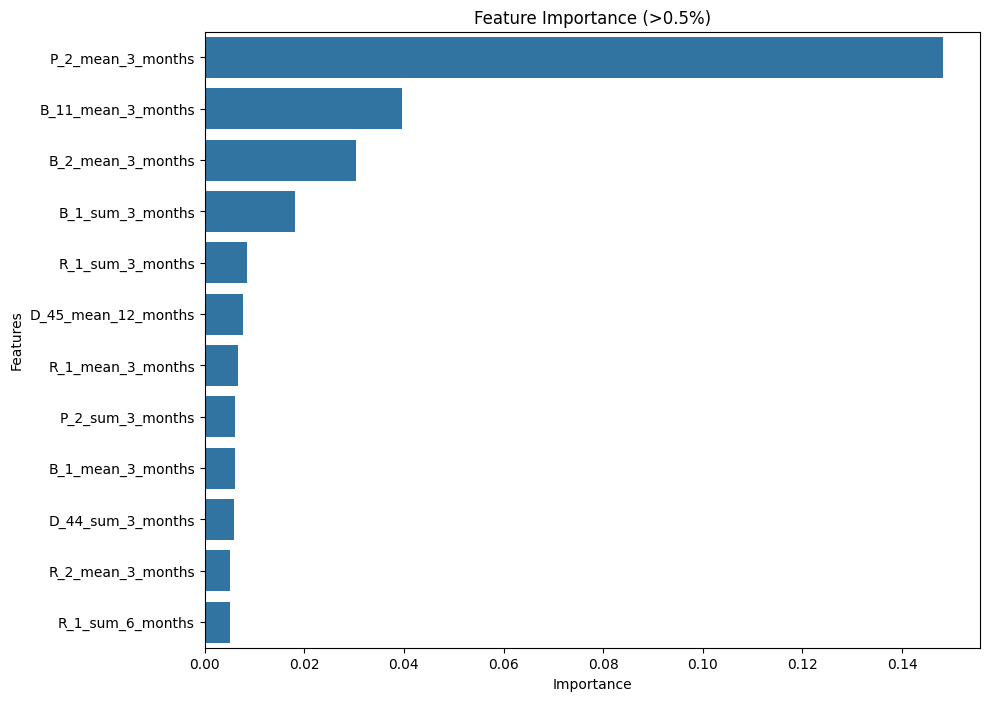

In [47]:
feature_importances = xgb_m1.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Filter the DataFrame for features with importance > 0.5%
important_features_df = feature_importance_df[feature_importance_df['Importance'] > 0.005]

# Sort the DataFrame based on the importance in descending order
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

print("Features with importance higher than 0.5%:")
print(important_features_df)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.barplot(x='Importance', y='Feature', data=important_features_df.sort_values('Importance', ascending=False))

plt.title('Feature Importance (>0.5%)')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

In [48]:
important_features_1 = []

for feature_name, importance in zip(X_train.columns, feature_importances):
    if importance > 0.005:  # Check if feature importance is greater than 0.5%
        important_features_1.append(feature_name)

print("Important features:", important_features_1)

Important features: ['B_1_sum_3_months', 'D_44_sum_3_months', 'P_2_sum_3_months', 'R_1_sum_3_months', 'B_1_mean_3_months', 'B_11_mean_3_months', 'B_2_mean_3_months', 'P_2_mean_3_months', 'R_1_mean_3_months', 'R_2_mean_3_months', 'R_1_sum_6_months', 'D_45_mean_12_months']


In [49]:
# Save the feature importance in an Excel file
feature_importances = xgb_m1.feature_importances_

# creating dataframe of feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance':feature_importances}).sort_values(by='Importance', ascending=False)


# filter features with importance higher than 0.5%
important_features_df = features_df[features_df['Importance']>0.005]


# write to Excel
with pd.ExcelWriter('feature_importance_xgb_m1.xlsx', engine='openpyxl') as writer:
    features_df.to_excel(writer, sheet_name='All Features', index=False)
    important_features_df.to_excel(writer, sheet_name='Important Features', index=False)

# XGB Model 2

In [50]:
xgb_m2 = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.5,
    max_depth = 4,
    subsample=0.5,  # Use 50% of observations to build each tree
    colsample_bytree=0.5,  # Use 50% of features to build each tree
    scale_pos_weight=5,  # Assign a weight of 5 to default observations
    eval_metric='logloss',
    use_label_encoder=False,
    seed=42
)

xgb_m2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [51]:
# Get feature importances
feature_importances_2 = xgb_m2.feature_importances_

# Print feature importance for features with importance > 0.5%
print("Features with importance higher than 0.5%:")
for feature_name, importance in zip(X_train.columns, feature_importances_2):
    if importance > 0.005:
        print(f'Feature: {feature_name}, Importance: {importance}')

Features with importance higher than 0.5%:
Feature: B_1_mean_3_months, Importance: 0.015336125157773495
Feature: B_11_mean_3_months, Importance: 0.019849075004458427
Feature: B_2_mean_3_months, Importance: 0.014043478295207024
Feature: D_48_mean_3_months, Importance: 0.005590813234448433
Feature: P_2_mean_3_months, Importance: 0.08842682838439941
Feature: P_2_mean_6_months, Importance: 0.037794582545757294


Features with importance higher than 0.5%:
                  Feature  Importance
234     P_2_mean_3_months    0.088427
140    B_11_mean_3_months    0.019849
138     B_1_mean_3_months    0.015336
148     B_2_mean_3_months    0.014043
99       R_1_sum_3_months    0.004943
96       P_2_sum_3_months    0.003071
248     R_2_mean_3_months    0.002488
63      D_44_sum_3_months    0.002111
237     R_1_mean_3_months    0.002051
1444  D_45_mean_12_months    0.000941
513      R_1_sum_6_months    0.000530
0        B_1_sum_3_months    0.000488


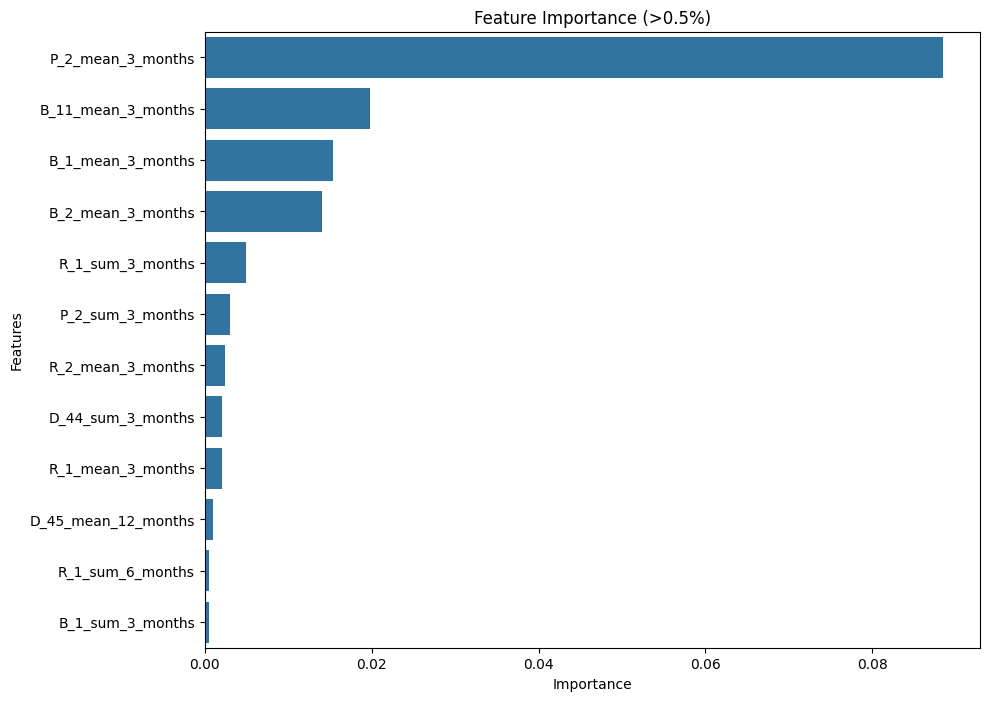

In [52]:
feature_importances_2 = xgb_m2.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_2
})

# Filter the DataFrame for features with importance > 0.5%
important_features_df_2 = feature_importance_df_2[feature_importance_df['Importance'] > 0.005]

# Sort the DataFrame based on the importance in descending order
important_features_df_2 = important_features_df_2.sort_values(by='Importance', ascending=False)

print("Features with importance higher than 0.5%:")
print(important_features_df_2)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.barplot(x='Importance', y='Feature', data=important_features_df_2.sort_values('Importance', ascending=False))

plt.title('Feature Importance (>0.5%)')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

In [53]:
important_features_2 = []

for feature_name, importance in zip(X_train.columns, feature_importances_2):
    if importance > 0.005:  # Check if feature importance is greater than 0.5%
        important_features_2.append(feature_name)

print("Important features:", important_features_2)

Important features: ['B_1_mean_3_months', 'B_11_mean_3_months', 'B_2_mean_3_months', 'D_48_mean_3_months', 'P_2_mean_3_months', 'P_2_mean_6_months']


In [54]:
# Save the feature importance in a Excel
feature_importances = xgb_m1.feature_importances_

# creating dataframe of feature importances
features_df_2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance':feature_importances_2}).sort_values(by='Importance', ascending=False)


# filter features with importance higher than 0.5%
important_features_df_2 = features_df_2[features_df_2['Importance']>0.005]


# write to Excel
with pd.ExcelWriter('feature_importance_xgb_m2.xlsx', engine='openpyxl') as writer:
    features_df_2.to_excel(writer, sheet_name='All Features', index=False)
    important_features_df_2.to_excel(writer, sheet_name='Important Features', index=False)

## Consolidate the most important features from both the models

In [55]:
print(important_features_1)
print('\n')
print(important_features_2)
print('\n')


# get a consolidated list of all these features:
unique_elements = set(important_features_1).union(set(important_features_2))

features = list(unique_elements)

print(features)

['B_1_sum_3_months', 'D_44_sum_3_months', 'P_2_sum_3_months', 'R_1_sum_3_months', 'B_1_mean_3_months', 'B_11_mean_3_months', 'B_2_mean_3_months', 'P_2_mean_3_months', 'R_1_mean_3_months', 'R_2_mean_3_months', 'R_1_sum_6_months', 'D_45_mean_12_months']


['B_1_mean_3_months', 'B_11_mean_3_months', 'B_2_mean_3_months', 'D_48_mean_3_months', 'P_2_mean_3_months', 'P_2_mean_6_months']


['R_1_sum_6_months', 'D_44_sum_3_months', 'D_48_mean_3_months', 'P_2_mean_6_months', 'R_1_sum_3_months', 'R_1_mean_3_months', 'P_2_sum_3_months', 'R_2_mean_3_months', 'B_11_mean_3_months', 'D_45_mean_12_months', 'B_2_mean_3_months', 'P_2_mean_3_months', 'B_1_mean_3_months', 'B_1_sum_3_months']


In [56]:
len(features)

14

## Recreate the Training and Test Features to Include only the above features

In [57]:
X_train = X_train[features]
X_test1 = X_test1[features]
X_test2 = X_test2[features]

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test1.shape)
print(y_test1.shape)
print(X_test2.shape)
print(y_test2.shape)

(62573, 14)
(62573,)
(13408, 14)
(13408,)
(13409, 14)
(13409,)


## XGBoost GridSearch

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],  # % of obs each tree
    'colsample_bytree': [0.5, 1.0],  # % of features each tree
    'scale_pos_weight': [1, 5, 10]  # Weight of default observations
}

xgb_clf = XGBClassifier(use_label_encoder=False, seed=4)
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=3)
grid_search_xgb.fit(X_train, y_train)

best_model = grid_search_xgb.best_estimator_yes

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.941 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.940 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.941 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.938 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.940 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.8;, score=0.941 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_yes'

In [60]:
from sklearn.metrics import roc_auc_score
import pandas as pd
from xgboost import XGBClassifier

# Initialize an empty DataFrame to store results
results_df_xgb = pd.DataFrame(columns=['n_estimators', 'learning_rate', 'Subsample %', 'Features',
                                       '% Weight of Default', 'AUC Train', 'AUC Test 1',
                                       'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search_xgb.cv_results_['params']):
    
    # Initialize the model with current parameters
    model = XGBClassifier(use_label_encoder=False, seed=4, **params)
    
    # Fit the model with the current parameter combination
    model.fit(X_train, y_train)  # Ensure to include eval_metric to avoid warnings
    
    # Predict probabilities for each set
    train_pred = model.predict_proba(X_train)[:, 1]
    test1_pred = model.predict_proba(X_test1)[:, 1]
    test2_pred = model.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame with the results
    temp_df = pd.DataFrame({
        'n_estimators': [params.get('n_estimators', 'Not specified')],
        'learning_rate': [params.get('learning_rate', 'Not specified')],
        'Subsample %': [f"{params.get('subsample', 0) * 100}%"],
        'Features': [f"{params.get('colsample_bytree', 0) * 100}%"],
        '% Weight of Default': [params.get('scale_pos_weight', 'Not specified')],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Append the temporary DataFrame to the main results DataFrame
    results_df_xgb = pd.concat([results_df_xgb, temp_df], ignore_index=True)

# Optionally, save the results to a CSV file
results_df_xgb.to_csv('grid_search_results_xgb.csv', index=False)

# Display the first few rows of the results DataFrame
results_df_xgb.head()

/tmp/ipykernel_100223/1855837724.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_xgb = pd.concat([results_df_xgb, temp_df], ignore_index=True)


,n_estimators,learning_rate,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.943850,0.943717,0.937085
1,50,0.01,80.0%,50.0%,1,0.944141,0.943440,0.936979
2,50,0.01,50.0%,50.0%,5,0.943075,0.942836,0.936036
3,50,0.01,80.0%,50.0%,5,0.943149,0.942827,0.936033
4,50,0.01,50.0%,50.0%,10,0.942751,0.942420,0.935439


In [61]:
results_df_xgb

,n_estimators,learning_rate,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.943850,0.943717,0.937085
1,50,0.01,80.0%,50.0%,1,0.944141,0.943440,0.936979
2,50,0.01,50.0%,50.0%,5,0.943075,0.942836,0.936036
3,50,0.01,80.0%,50.0%,5,0.943149,0.942827,0.936033
4,50,0.01,50.0%,50.0%,10,0.942751,0.942420,0.935439
5,50,0.01,80.0%,50.0%,10,0.942880,0.942396,0.935735
6,100,0.01,50.0%,50.0%,1,0.945085,0.944461,0.937873
7,100,0.01,80.0%,50.0%,1,0.945465,0.944420,0.937860
8,100,0.01,50.0%,50.0%,5,0.944453,0.943767,0.937020
9,100,0.01,80.0%,50.0%,5,0.944638,0.943718,0.937114


In [62]:
# calculate the mean auc
results_df_xgb['Average AUC'] = results_df_xgb[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)

# calculate
results_df_xgb['Std AUC'] = results_df_xgb[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

results_df_xgb
# results_df_xgb.iloc[:, 5:]

,n_estimators,learning_rate,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2,Average AUC,Std AUC
0,50,0.01,50.0%,50.0%,1,0.943850,0.943717,0.937085,0.941551,0.003868
1,50,0.01,80.0%,50.0%,1,0.944141,0.943440,0.936979,0.941520,0.003948
2,50,0.01,50.0%,50.0%,5,0.943075,0.942836,0.936036,0.940649,0.003997
3,50,0.01,80.0%,50.0%,5,0.943149,0.942827,0.936033,0.940670,0.004019
4,50,0.01,50.0%,50.0%,10,0.942751,0.942420,0.935439,0.940204,0.004130
5,50,0.01,80.0%,50.0%,10,0.942880,0.942396,0.935735,0.940337,0.003993
6,100,0.01,50.0%,50.0%,1,0.945085,0.944461,0.937873,0.942473,0.003996
7,100,0.01,80.0%,50.0%,1,0.945465,0.944420,0.937860,0.942582,0.004123
8,100,0.01,50.0%,50.0%,5,0.944453,0.943767,0.937020,0.941746,0.004108
9,100,0.01,80.0%,50.0%,5,0.944638,0.943718,0.937114,0.941823,0.004104


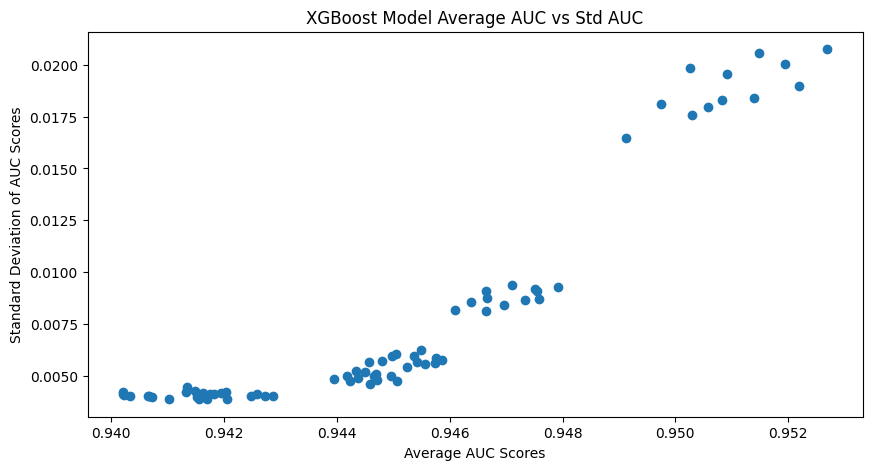

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_xgb['Average AUC'], results_df_xgb['Std AUC'])
xlab = 'Average AUC Scores'
ylab = 'Standard Deviation of AUC Scores'
title = 'XGBoost Model Average AUC vs Std AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

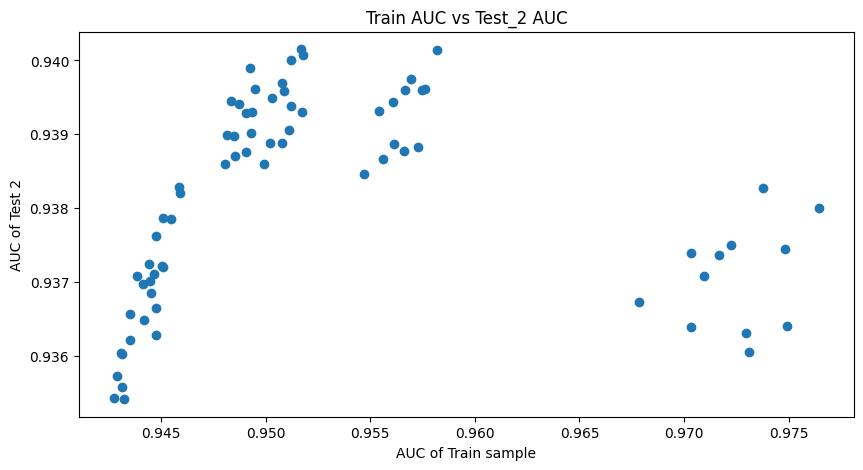

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_xgb['AUC Train'], results_df_xgb['AUC Test 2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'Train AUC vs Test_2 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

## Best XGBoost Model based on Bias and Variance

In [65]:
# Calculate the absolute difference between 'AUC Train' and 'AUC Test 1'
results_df_xgb['AUC Diff'] = abs(results_df_xgb['AUC Train'] - results_df_xgb['AUC Test 1'])

# Find the minimum difference to identify the models with the closest train and test performance
min_diff = results_df_xgb['AUC Diff'].min()

# Filter the DataFrame to rows that match the minimum difference
min_diff_rows = results_df_xgb[results_df_xgb['AUC Diff'] == min_diff]

# From those rows, find the one with the highest 'AUC Test 2'
highest_test_auc_index = min_diff_rows['AUC Test 2'].idxmax()

# Select the best row based on the criteria
xgb_final = results_df_xgb.loc[highest_test_auc_index]

print("Row with the highest 'AUC Test 2' and smallest difference between 'AUC Train' and 'AUC Test 2':")
print(xgb_final)

Row with the highest 'AUC Test 2' and smallest difference between 'AUC Train' and 'AUC Test 2':
n_estimators                 50
learning_rate              0.01
Subsample %               50.0%
Features                  50.0%
% Weight of Default           1
AUC Train               0.94385
AUC Test 1             0.943717
AUC Test 2             0.937085
Average AUC            0.941551
Std AUC                0.003868
AUC Diff               0.000133
Name: 0, dtype: object


In [66]:
# Using the results_df_xgb to find the best model
xgb_final = results_df_xgb.loc[highest_test_auc_index]

best_xgb_model_params = {
    'n_estimators': xgb_final['n_estimators'],
    'learning_rate': xgb_final['learning_rate'],
    'subsample': float(xgb_final['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(xgb_final['Features'][:-1]) / 100.0,
    'scale_pos_weight': xgb_final['% Weight of Default']
}

print("Best Model Parameter:")
print(xgb_final)

Best Model Parameter:
n_estimators                 50
learning_rate              0.01
Subsample %               50.0%
Features                  50.0%
% Weight of Default           1
AUC Train               0.94385
AUC Test 1             0.943717
AUC Test 2             0.937085
Average AUC            0.941551
Std AUC                0.003868
AUC Diff               0.000133
Name: 0, dtype: object


In [67]:
xgb_final = XGBClassifier(**best_xgb_model_params)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
print(xgb_final.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

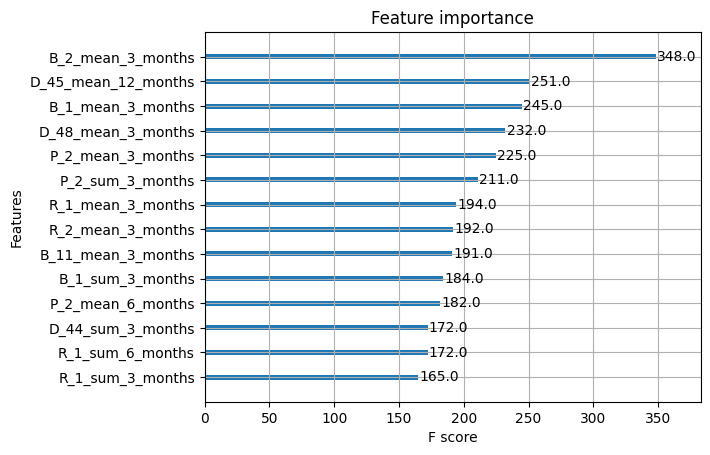

In [69]:
from xgboost import plot_importance
plot_importance(xgb_final)

#### Model peformance Functions

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

def model_performance(model_name,
                      X_train_data,
                      y_train_data, 
                      X_test_data1,
                      y_test_data1,
                      X_test_data2,
                      y_test_data2): 

    train_preds = model_name.predict(X_train_data)
    test_preds1= model_name.predict(X_test_data1)
    test_preds2 = model_name.predict(X_test_data2)

    
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data1, test_preds1)
    e = classification_report(y_test_data2, test_preds2)
    
    c = round(model_name.score(X_train_data, y_train_data),4)
    d = round(model_name.score(X_test_data1, y_test_data1),4)
    f = round(model_name.score(X_test_data2, y_test_data2),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data 1')
    print(b)
    print('\n')
    print('classification report for testing data 2')
    print(e)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data 1 is ',d)
    print('the model score for testing data 2 is ',f)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=3)
    fig.set_size_inches(20,5)

    plt.subplot(1,3,1)
    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    
    
    plt.subplot(1,3,2) 
    sns.heatmap(confusion_matrix(y_test_data1, test_preds1), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data 1')


    plt.subplot(1,3,3) 
    sns.heatmap(confusion_matrix(y_test_data2, test_preds2), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data 2')

In [71]:
# ROC AUC Plots
def roc_score_auc_curve(model_name,
                      X_train_data,
                      y_train_data, 
                      X_test_data1,
                      y_test_data1,
                      X_test_data2,
                      y_test_data2):
    
    train_preds = model_name.predict(X_train_data)
    test_preds1= model_name.predict(X_test_data1)

    
    a = round(roc_auc_score(y_train_data, model_name.predict_proba(X_train_data)[:,1]),4)
    b = round(roc_auc_score(y_test_data1, model_name.predict_proba(X_test_data1)[:,1]),4)
    c = round(roc_auc_score(y_test_data2, model_name.predict_proba(X_test_data2)[:,1]),4)
    
    print('AUC Score for Model on Training Data is',a)
    print('AUC Score for Model on Testing Data 1 is',b)
    print('AUC Score for Model on Testing Data 2 is',c)
    
    
    plt.figure(figsize=(12,7))
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_data, model_name.predict_proba(X_train_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(train_fpr, train_tpr, marker='.') 
  

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_data1, model_name.predict_proba(X_test_data1)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr, test_tpr, marker='o') 


    test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test_data2, model_name.predict_proba(X_test_data2)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr2, test_tpr2, marker='o')
    

### Final XGBoost Model's Performance

classification report for training data
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     46463
           1       0.94      0.26      0.40     16110

    accuracy                           0.80     62573
   macro avg       0.87      0.62      0.64     62573
weighted avg       0.83      0.80      0.76     62573



classification report for testing data 1
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9945
           1       0.96      0.26      0.40      3463

    accuracy                           0.80     13408
   macro avg       0.88      0.63      0.64     13408
weighted avg       0.84      0.80      0.76     13408



classification report for testing data 2
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9883
           1       0.95      0.25      0.39      3526

    accuracy                           0.80     13409
  

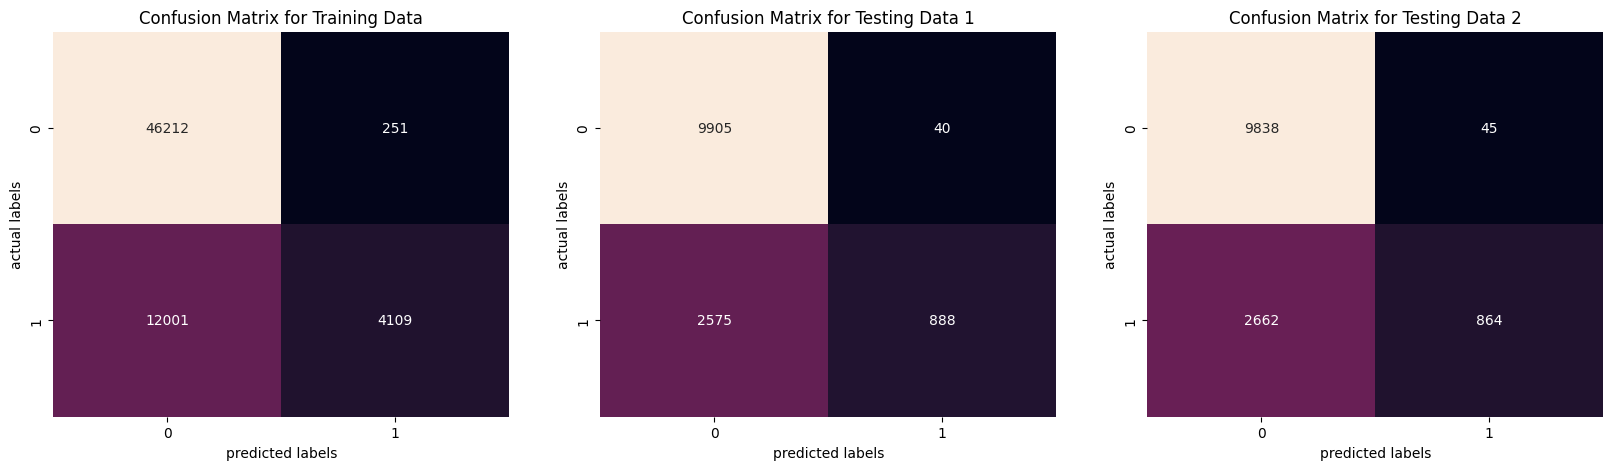

In [72]:
model_performance(model_name=xgb_final,
                      X_train_data=X_train,
                      y_train_data=y_train, 
                      X_test_data1=X_test1,
                      y_test_data1=y_test1,
                      X_test_data2=X_test2,
                      y_test_data2=y_test2)

AUC Score for Model on Training Data is 0.944
AUC Score for Model on Testing Data 1 is 0.9438
AUC Score for Model on Testing Data 2 is 0.9374


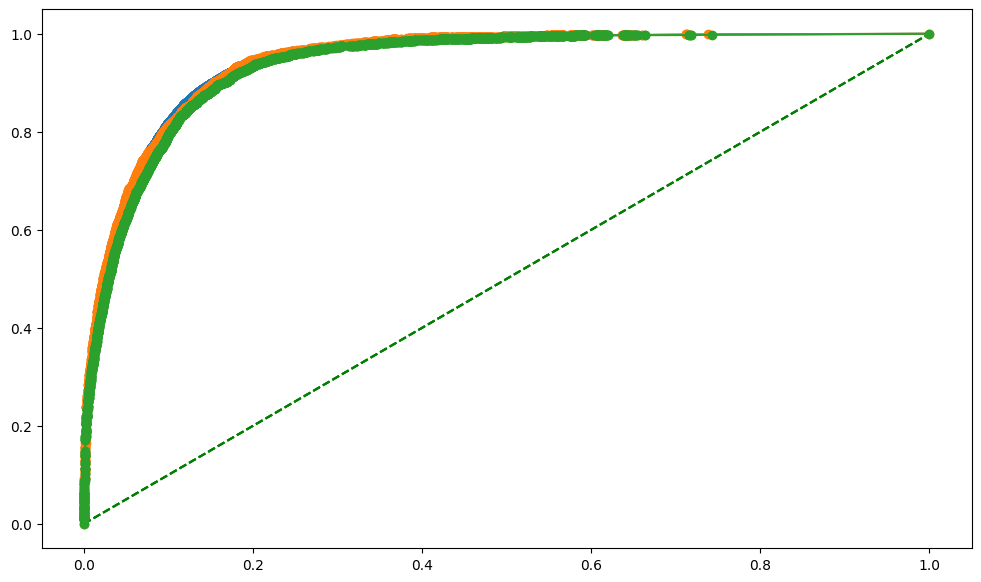

In [73]:
roc_score_auc_curve(model_name=xgb_final,
                      X_train_data=X_train,
                      y_train_data=y_train, 
                      X_test_data1=X_test1,
                      y_test_data1=y_test1,
                      X_test_data2=X_test2,
                      y_test_data2=y_test2)

In [74]:
def k_fold_cross_valscore(model_name,
                          x_train_data,
                          y_train_data,
                          folds
                         ):
    from sklearn.model_selection import cross_val_score
    import pandas as pd
    
    model_kfold_recall = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='recall', verbose=0)
    model_kfold_accuracy = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='accuracy', verbose=0)
    model_kfold_precision = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='precision', verbose=0)
    model_kfold_f1 = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='f1', verbose=0)
    
    a = pd.DataFrame(model_kfold_recall)
    b = pd.DataFrame(model_kfold_accuracy)
    c = pd.DataFrame(model_kfold_precision)
    d = pd.DataFrame(model_kfold_f1)

    cross_val_data = pd.concat([a,b,c,d], ignore_index=True, axis=1)
    cross_val_data.rename(columns={0:"Recall", 1:"Accuracy", 2:"Precision",3:"F1 Score"},
                        inplace=True)
       
   
    print('\n')
    print("The mean recall for the model after " ,folds," folds is ", np.mean(model_kfold_recall))
    print("The mean accuracy for model after ",folds," folds is", np.mean(model_kfold_accuracy))
    print("the mean precision for the model after ",folds," folds is",np.mean(model_kfold_precision))
    print("the mean f1 score for the model after ",folds," folds is", np.mean(model_kfold_f1))
    print("\n")
    return cross_val_data

In [75]:
# K- Fold Cross Validation for Training Data
k_fold_cross_valscore(model_name =xgb_final,
                      x_train_data = X_train,
                      y_train_data = y_train,
                      folds = 10)



The mean recall for the model after  10  folds is  0.2533209186840472
The mean accuracy for model after  10  folds is 0.8033816545411614
the mean precision for the model after  10  folds is 0.9372352023133962
the mean f1 score for the model after  10  folds is 0.3987761709950937




,Recall,Accuracy,Precision,F1 Score
0,0.250155,0.802972,0.941589,0.395292
1,0.254500,0.803611,0.936073,0.400195
2,0.256983,0.803292,0.924107,0.402137
3,0.255742,0.804219,0.940639,0.402147
4,0.263191,0.804539,0.921739,0.409464
5,0.255121,0.805178,0.955814,0.402744
6,0.240844,0.799584,0.926014,0.382266
7,0.247052,0.801822,0.936471,0.390963
8,0.245810,0.802461,0.949640,0.390533
9,0.263811,0.806137,0.940265,0.412021


In [76]:
# K- Fold Cross Validation for Testing Data 1
k_fold_cross_valscore(model_name =xgb_final,
                      x_train_data = X_test1,
                      y_train_data = y_test1,
                      folds = 10)



The mean recall for the model after  10  folds is  0.28993270143759065
The mean accuracy for model after  10  folds is 0.8116793549033356
the mean precision for the model after  10  folds is 0.9385401993619761
the mean f1 score for the model after  10  folds is 0.4423666012991398




,Recall,Accuracy,Precision,F1 Score
0,0.286127,0.811335,0.942857,0.439024
1,0.254335,0.800895,0.907216,0.397291
2,0.335260,0.820283,0.913386,0.490486
3,0.309249,0.821029,0.990741,0.471366
4,0.329480,0.822521,0.950000,0.489270
5,0.296830,0.812826,0.936364,0.450766
6,0.279539,0.806861,0.915094,0.428256
7,0.256484,0.800895,0.908163,0.400000
8,0.286127,0.811194,0.942857,0.439024
9,0.265896,0.808955,0.978723,0.418182


In [77]:
# K- Fold Cross Validation for Testing Data 2
k_fold_cross_valscore(model_name =xgb_final,
                      x_train_data = X_test2,
                      y_train_data = y_test2,
                      folds = 10)



The mean recall for the model after  10  folds is  0.2444702871491115
The mean accuracy for model after  10  folds is 0.7978969247721126
the mean precision for the model after  10  folds is 0.9503876077076953
the mean f1 score for the model after  10  folds is 0.38838613582989046




,Recall,Accuracy,Precision,F1 Score
0,0.254958,0.797166,0.909091,0.398230
1,0.229462,0.795675,0.975904,0.371560
2,0.218130,0.791946,0.962500,0.355658
3,0.271955,0.805369,0.960000,0.423841
4,0.226629,0.793438,0.952381,0.366133
5,0.263456,0.801641,0.939394,0.411504
6,0.221591,0.792692,0.951220,0.359447
7,0.272727,0.803878,0.932039,0.421978
8,0.244318,0.799403,0.966292,0.390023
9,0.241477,0.797761,0.955056,0.385488


### Shap Analysis for XGBoost Model

In [78]:
# !pip install shap

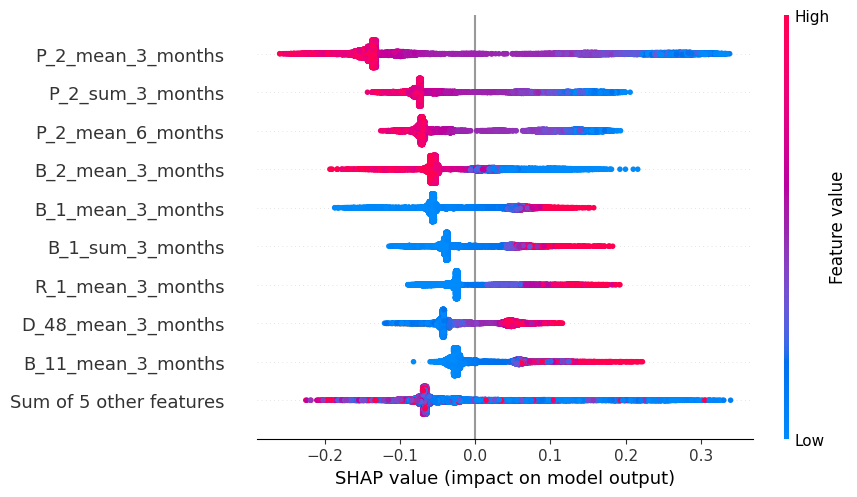

In [79]:
import shap

# bee swarm plot
explainer = shap.Explainer(xgb_final)
shap_values = explainer(X_test2)

shap.plots.beeswarm(shap_values)

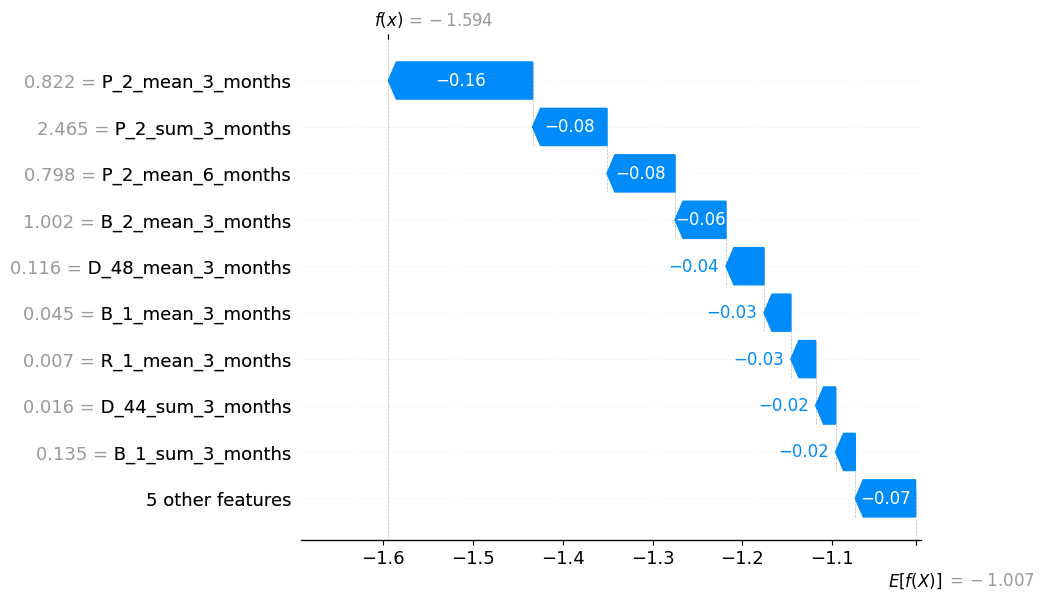

In [80]:
# waterfall plot
shap.plots.waterfall(shap_values[150])

### Score Bins

Parameters of the final model: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


AUC on Train: 0.9439516733397779
AUC on Test 1: 0.9437551058688801
AUC on 

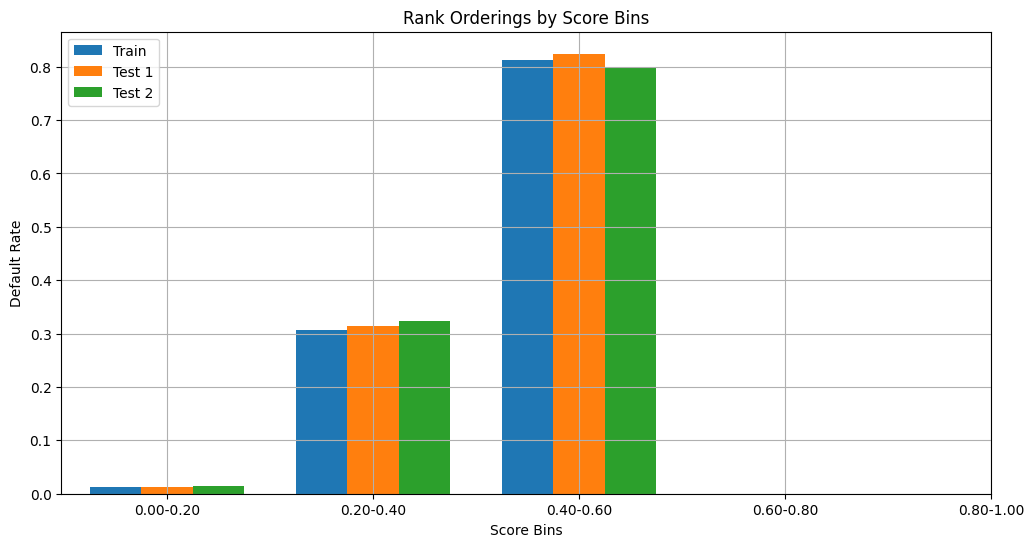

In [81]:
# 1. Show the parameters of the final model
print("Parameters of the final model:", xgb_final.get_params())
print('\n')

# 2. Calculate and display AUC on each sample
y_train_pred = xgb_final.predict_proba(X_train)[:, 1]
y_test1_pred = xgb_final.predict_proba(X_test1)[:, 1]
y_test2_pred = xgb_final.predict_proba(X_test2)[:, 1]

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test1 = roc_auc_score(y_test1, y_test1_pred)
auc_test2 = roc_auc_score(y_test2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# 3. Define score bins based on the train sample
bins = np.linspace(0, 1, 6)  # Creates 5 bins between 0 and 1

# 4. Apply the same thresholds to test samples and calculate default rates
def calculate_default_rate(y_true, y_pred, bins):
    indices = np.digitize(y_pred, bins) - 1  # Find bin index for each prediction
    default_rate = [np.mean(y_true[indices == i]) for i in range(len(bins)-1)]
    return default_rate

default_rates_train = calculate_default_rate(y_train, y_train_pred, bins)
default_rates_test1 = calculate_default_rate(y_test1, y_test1_pred, bins)
default_rates_test2 = calculate_default_rate(y_test2, y_test2_pred, bins)

# 5. Show rank orderings in a Bar-Chart
width = 0.25  # Width of the bars
x_indexes = np.arange(len(bins)-1)

plt.figure(figsize=(12, 6))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2')

# Formatting the plot
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)])
plt.legend()
plt.grid(True)
plt.show()


# Neural Network

### Outlier Analysis

In [82]:
print(features)

['R_1_sum_6_months', 'D_44_sum_3_months', 'D_48_mean_3_months', 'P_2_mean_6_months', 'R_1_sum_3_months', 'R_1_mean_3_months', 'P_2_sum_3_months', 'R_2_mean_3_months', 'B_11_mean_3_months', 'D_45_mean_12_months', 'B_2_mean_3_months', 'P_2_mean_3_months', 'B_1_mean_3_months', 'B_1_sum_3_months']


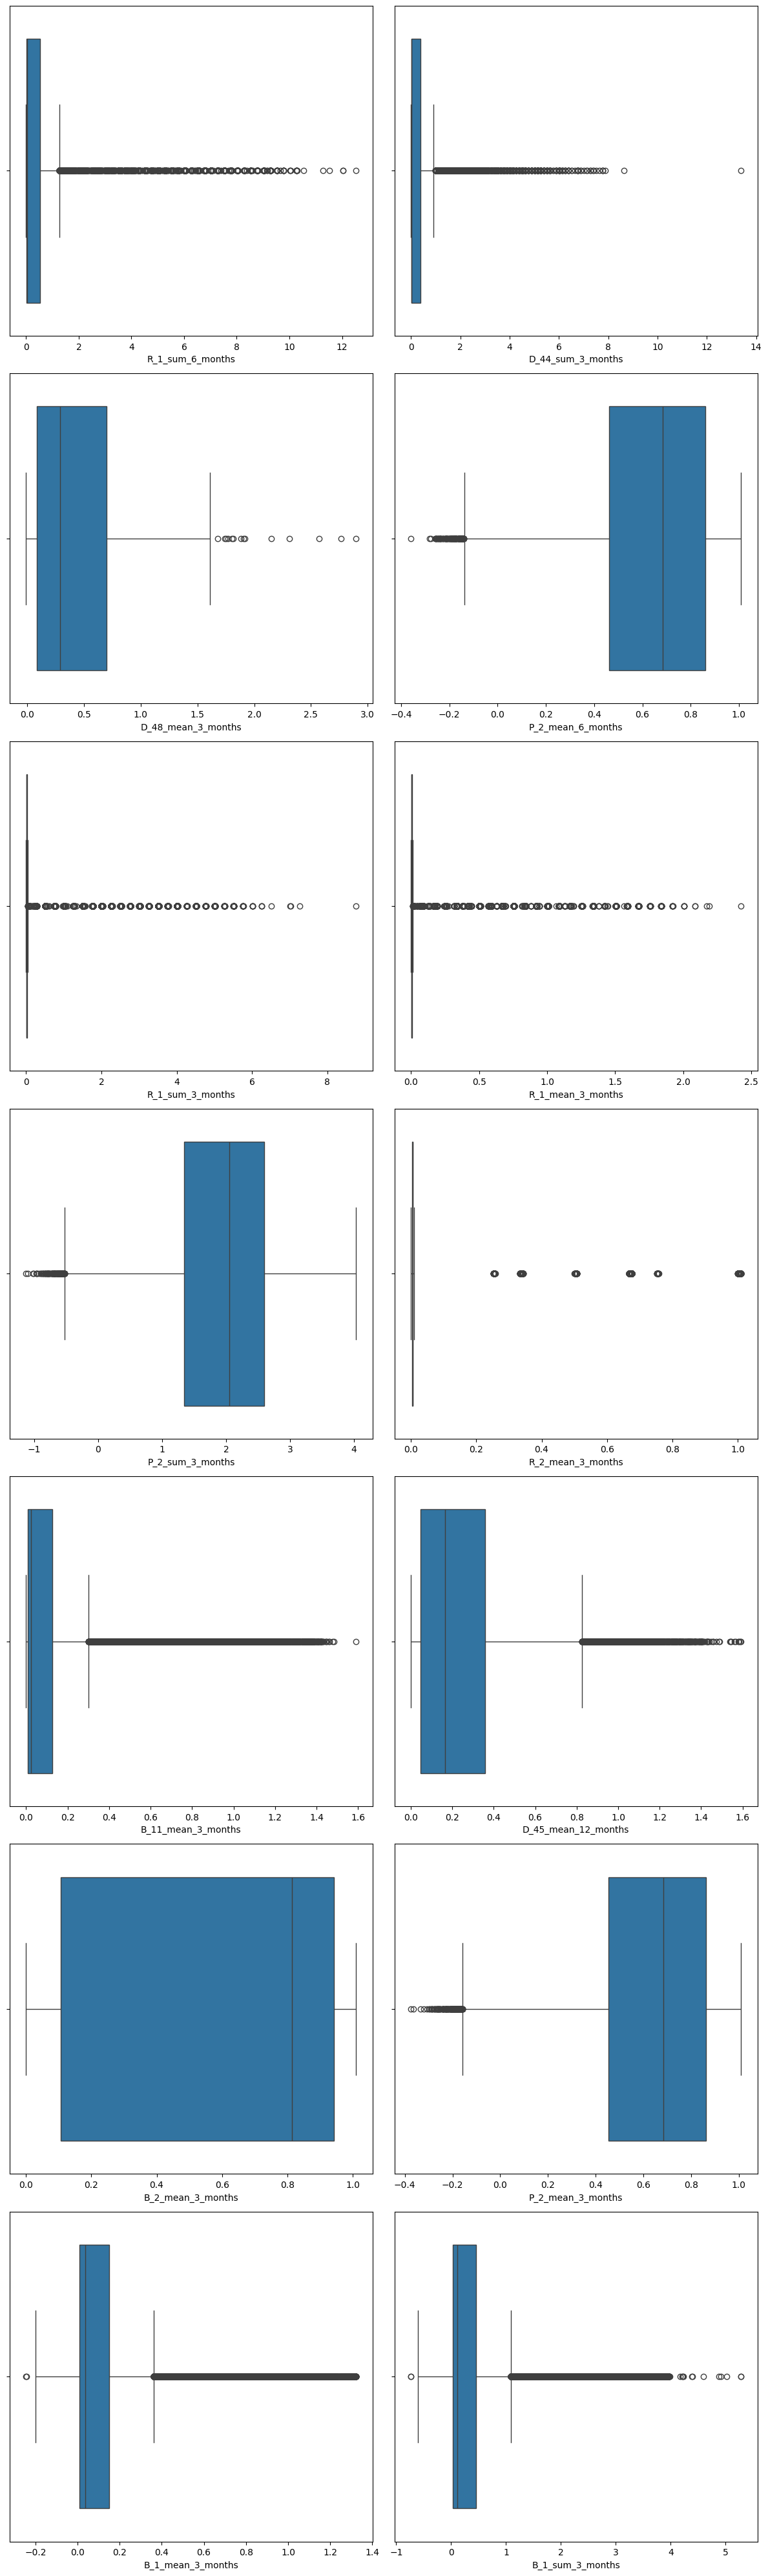

In [83]:
num_plots = len(features)

num_rows = (num_plots + 1) // 2 # to make sure we have enough rows for odd number of variables
num_cols = 2

# create subplots with the above calculated num_rows and num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,40))

axes = axes.flatten()

# iterate over the columns and create boxplots
for i, column in enumerate(features):
    sns.boxplot(x = column, data=final_df, ax=axes[i]) #orient='v')
    #sns.despine(offset = 10, trim=True, ax=axes[i])

# hide any empty subplots
for j in range(len(num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [84]:
# Capping the outliers at 1 and 99 percentile

# Calculating the 1st and 99th Percentile
for feature in features:
    lower_bound = X_train[feature].quantile(0.01)
    upper_bound = X_train[feature].quantile(0.99)

    for dframe in [X_train, X_test1, X_test2]:
        dframe.loc[:, feature] = np.where(dframe[feature] < lower_bound, lower_bound, dframe[feature])
        dframe.loc[:, feature] = np.where(dframe[feature] > upper_bound, upper_bound, dframe[feature])

        # impute missing values with 0
        dframe.loc[:, feature] = dframe[feature].fillna(0)

In [85]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data
X_train[features] = scaler.fit_transform(X_train[features])


# Apply the same tranformation to test and vaidation data
X_test1[features] = scaler.transform(X_test1[features])
X_test2[features] = scaler.transform(X_test2[features])

# Neural Network

In [86]:
# !pip install tensorflow

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-04-02 21:27:41.013378: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 21:27:41.069542: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 21:27:41.257611: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 21:27:42.258155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming your datasets are defined: X_train, y_train, X_test1, y_test1, X_test2, y_test2

def build_model(hidden_layers, nodes, activation, dropout, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(shape=(input_shape,)))  # Adjust based on your dataset
    for _ in range(hidden_layers):
        model.add(Dense(nodes, activation=activation))
        if dropout < 1.0:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

results_list = []  # List to hold all results before creating DataFrame

parameter_grid = [
    (hl, n, af, d, bs)
    for hl in [2, 4]
    for n in [4, 6]
    for af in ['relu', 'tanh']
    for d in [0.5, 0.0]  # 0.0 represents no dropout
    for bs in [100, 10000]
]

input_shape = X_train.shape[1]  # Ensure this matches your dataset

for hl, n, af, d, bs in parameter_grid:
    model = build_model(hl, n, af, d, input_shape)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=bs, verbose=0)
    
    # Evaluate model performance using roc_auc_score
    auc_train = roc_auc_score(y_train, model.predict(X_train).ravel())
    auc_test_1 = roc_auc_score(y_test1, model.predict(X_test1).ravel())
    auc_test_2 = roc_auc_score(y_test2, model.predict(X_test2).ravel())
    
    # Collect results
    results_list.append({
        '# HL': hl,
        '# Node': n,
        'Activation Function': af,
        'Dropout': d,
        'Batch Size': bs,
        'AUC Train': auc_train,
        'AUC Test 1': auc_test_1,
        'AUC Test 2': auc_test_2
    })

# Convert the list of dictionaries to a DataFrame
results_df_nn = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
results_df_nn.to_csv('grid_search_results_nn.csv', index=False)

print("Grid search completed and results saved.")


2024-04-02 21:27:42.953243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-02 21:27:42.954378: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/

In [89]:
results_df_nn

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,0.5,100,0.938117,0.941977,0.934982
1,2,4,relu,0.5,10000,0.912413,0.916647,0.907274
2,2,4,relu,0.0,100,0.940586,0.944210,0.936874
3,2,4,relu,0.0,10000,0.889224,0.896077,0.887534
4,2,4,tanh,0.5,100,0.937011,0.940783,0.933440
5,2,4,tanh,0.5,10000,0.910610,0.914909,0.906355
6,2,4,tanh,0.0,100,0.941083,0.944061,0.936844
7,2,4,tanh,0.0,10000,0.918360,0.919901,0.913770
8,2,6,relu,0.5,100,0.939225,0.943060,0.935460
9,2,6,relu,0.5,10000,0.797352,0.804152,0.790553


In [90]:
# calculate the mean auc
results_df_nn['Average AUC'] = results_df_nn[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
# calculate the std for auc
results_df_nn['Std AUC'] = results_df_nn[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

results_df_nn
# results_df_xgb.iloc[:, 5:]

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2,Average AUC,Std AUC
0,2,4,relu,0.5,100,0.938117,0.941977,0.934982,0.938359,0.003504
1,2,4,relu,0.5,10000,0.912413,0.916647,0.907274,0.912111,0.004694
2,2,4,relu,0.0,100,0.940586,0.944210,0.936874,0.940557,0.003668
3,2,4,relu,0.0,10000,0.889224,0.896077,0.887534,0.890945,0.004524
4,2,4,tanh,0.5,100,0.937011,0.940783,0.933440,0.937078,0.003672
5,2,4,tanh,0.5,10000,0.910610,0.914909,0.906355,0.910624,0.004277
6,2,4,tanh,0.0,100,0.941083,0.944061,0.936844,0.940663,0.003627
7,2,4,tanh,0.0,10000,0.918360,0.919901,0.913770,0.917344,0.003189
8,2,6,relu,0.5,100,0.939225,0.943060,0.935460,0.939248,0.003800
9,2,6,relu,0.5,10000,0.797352,0.804152,0.790553,0.797352,0.006800


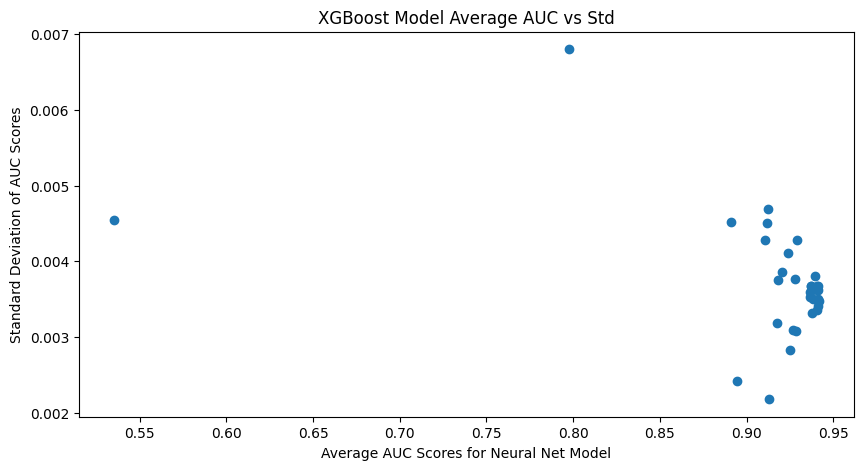

In [91]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_nn['Average AUC'], results_df_nn['Std AUC'])
xlab = 'Average AUC Scores for Neural Net Model'
ylab = 'Standard Deviation of AUC Scores'
title = 'XGBoost Model Average AUC vs Std'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

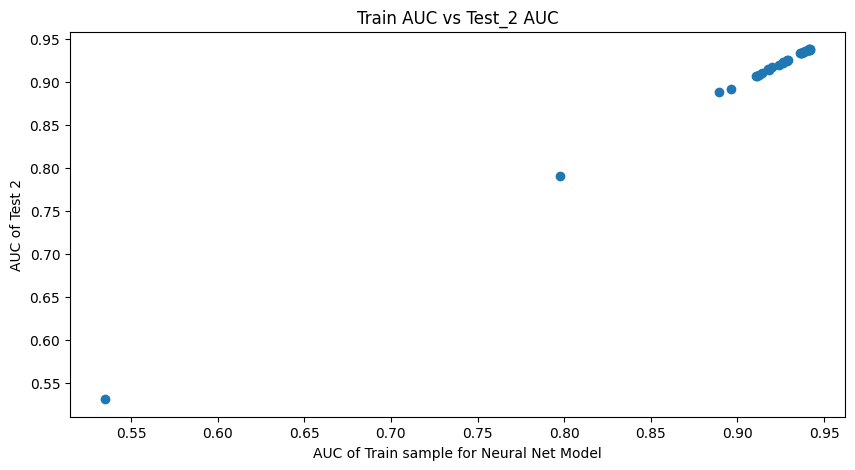

In [92]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_nn['AUC Train'], results_df_nn['AUC Test 2'])
xlab = 'AUC of Train sample for Neural Net Model'
ylab = 'AUC of Test 2'
title = 'Train AUC vs Test_2 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

### Best Neural Net based On Bias and Variance

In [93]:
# Analyze the results to get the optimal parameters
# Load the results
results_df_nn = pd.read_csv('grid_search_results_nn.csv')

# Find the row with the highest test AUC and smallest difference between train and test AUC
results_df_nn['AUC Diff'] = abs(results_df_nn['AUC Train'] - results_df_nn[['AUC Test 1', 'AUC Test 2']].mean(axis=1))
best_model_nn = results_df_nn.loc[(results_df_nn[['AUC Test 1', 'AUC Test 2']].mean(axis=1) - results_df_nn['AUC Diff']).idxmax()]

print("Optimal Parameters:")
print(best_model_nn)

Optimal Parameters:
# HL                          4
# Node                        4
Activation Function        relu
Dropout                     0.0
Batch Size                  100
AUC Train              0.941479
AUC Test 1             0.944658
AUC Test 2             0.937835
AUC Diff               0.000232
Name: 18, dtype: object


In [94]:
# Extracting parameters from best_model_nn
hl = int(best_model_nn['# HL'])  # Number of hidden layers
n = int(best_model_nn['# Node'])  # Nodes per layer
af = best_model_nn['Activation Function']  # Activation function
d = float(best_model_nn['Dropout'])  # Dropout rate
bs = int(best_model_nn['Batch Size'])  # Batch size

# Define the final model (nn_final) with optimum parameters
nn_final = Sequential()
nn_final.add(tf.keras.Input(shape=(X_train.shape[1],)))  # Use the actual input shape of your dataset
for _ in range(hl):
    nn_final.add(Dense(n, activation=af))
    if d < 1.0:
        nn_final.add(Dropout(d))
nn_final.add(Dense(1, activation='sigmoid'))  # Assuming a binary classification task
nn_final.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

# Train the model (nn_final) with optimal parameters
nn_final.fit(X_train, y_train, epochs=20, batch_size=bs, verbose=1)

Epoch 1/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.7173 - loss: 0.5415
Epoch 2/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9377 - loss: 0.2739
Epoch 3/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9378 - loss: 0.2740
Epoch 4/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9388 - loss: 0.2709
Epoch 5/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9388 - loss: 0.2714
Epoch 6/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9376 - loss: 0.2747
Epoch 7/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9390 - loss: 0.2718
Epoch 8/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9399 - loss: 0.2686
Epoch 9/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9395 - loss: 0.2697
Epoch 10/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9385 - loss: 0.2711
Epoch 11/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9405 - loss: 0.2678
Epoch 12/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.9409 - loss: 0.2662
Epoch 13/20
626/626 ━━━━━

In [95]:
print(nn_final)

<Sequential name=sequential_32, built=True>


In [96]:
# Evaluate the model
auc_train = roc_auc_score(y_train, nn_final.predict(X_train).ravel())
auc_test_1 = roc_auc_score(y_test1, nn_final.predict(X_test1).ravel())
print(f"Retrained Model AUC: Train={auc_train}, Test1={auc_test_1}")

1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
Retrained Model AUC: Train=0.9403733389882337, Test1=0.9439094343172751


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

def model_performance(model, X_train, y_train, X_test1, y_test1, X_test2, y_test2): 
    # Getting predictions
    train_preds = model.predict(X_train).ravel()
    test_preds1 = model.predict(X_test1).ravel()
    test_preds2 = model.predict(X_test2).ravel()
    
    # Converting probabilities to class labels based on 0.5 threshold
    train_preds = np.where(train_preds > 0.5, 1, 0)
    test_preds1 = np.where(test_preds1 > 0.5, 1, 0)
    test_preds2 = np.where(test_preds2 > 0.5, 1, 0)

    # Classification reports
    print('Classification report for training data')
    print(classification_report(y_train, train_preds))
    print('Classification report for testing data 1')
    print(classification_report(y_test1, test_preds1))
    print('Classification report for testing data 2')
    print(classification_report(y_test2, test_preds2))

    # Plotting confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    sns.heatmap(confusion_matrix(y_train, train_preds), annot=True, cbar=False, fmt='d', ax=axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('Actual labels')
    axes[0].set_title('Confusion Matrix for Training Data')
    
    sns.heatmap(confusion_matrix(y_test1, test_preds1), annot=True, cbar=False, fmt='d', ax=axes[1])
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')
    axes[1].set_title('Confusion Matrix for Testing Data 1')
    
    sns.heatmap(confusion_matrix(y_test2, test_preds2), annot=True, cbar=False, fmt='d', ax=axes[2])
    axes[2].set_xlabel('Predicted labels')
    axes[2].set_ylabel('Actual labels')
    axes[2].set_title('Confusion Matrix for Testing Data 2')
    
    plt.tight_layout()
    plt.show()


1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
Classification report for training data
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     46463
           1       0.77      0.75      0.76     16110

    accuracy                           0.88     62573
   macro avg       0.84      0.84      0.84     62573
weighted avg       0.88      0.88      0.88     62573

Classification report for testing data 1
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9945
           1       0.79      0.74      0.76      3463

    accuracy                           0.88     13408
   macro avg       0.85      0.83      0.84     13408
weighted avg       0.88      0.88      0.88     13408

Classification report for testing data 2
              precision    recall  f1-score   support

           0       0.91      0.92     

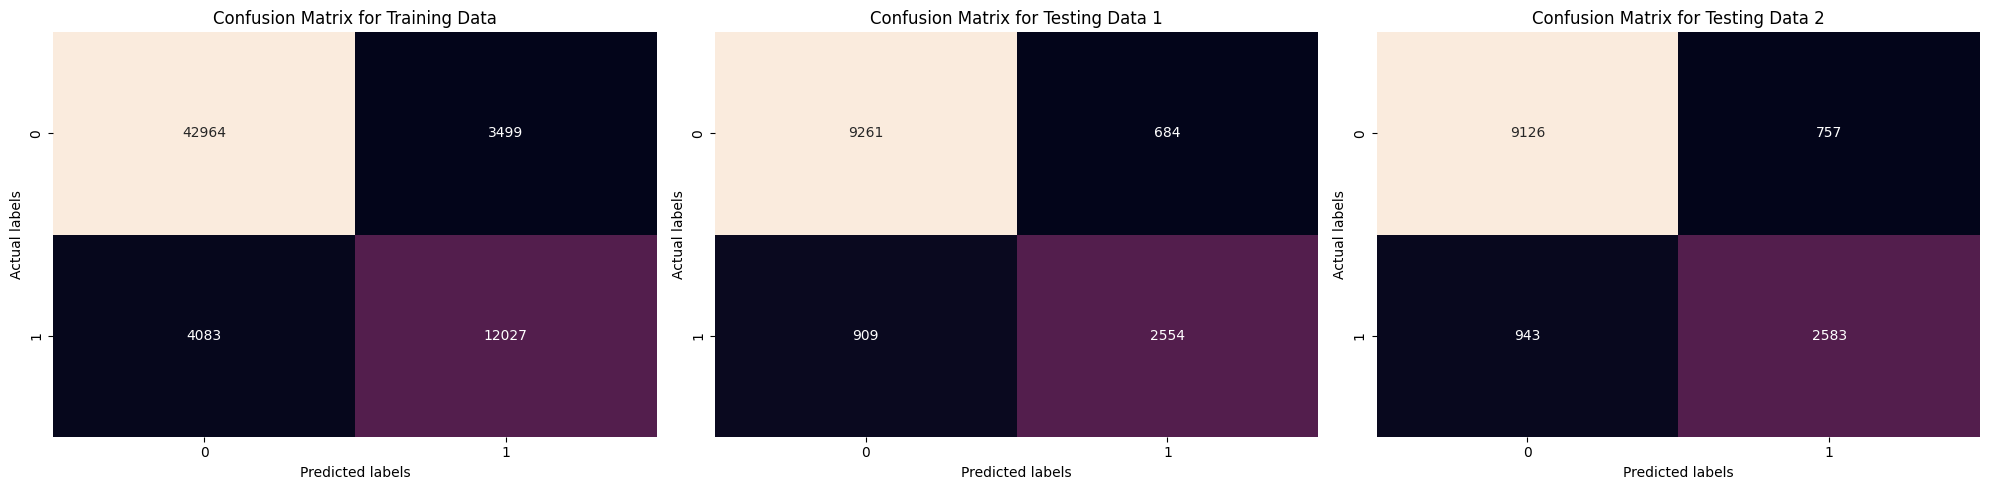

In [98]:
model_performance(nn_final, X_train, y_train, X_test1, y_test1, X_test2, y_test2)

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def roc_score_auc_curve_nn(model, X_train, y_train, X_test1, y_test1, X_test2, y_test2):
    # Getting the predicted probabilities
    train_preds = model.predict(X_train).ravel()
    test_preds1 = model.predict(X_test1).ravel()
    test_preds2 = model.predict(X_test2).ravel()
    
    # Calculating ROC AUC scores
    a = round(roc_auc_score(y_train, train_preds), 4)
    b = round(roc_auc_score(y_test1, test_preds1), 4)
    c = round(roc_auc_score(y_test2, test_preds2), 4)
    
    print('AUC Score for Model on Training Data is', a)
    print('AUC Score for Model on Testing Data 1 is', b)
    print('AUC Score for Model on Testing Data 2 is', c)
    
    # Plotting ROC curves
    plt.figure(figsize=(12, 7))
    
    # Training Data
    train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
    plt.plot(train_fpr, train_tpr, label=f'Train AUC: {a}', marker='.')
    
    # Test Data 1
    test_fpr, test_tpr, _ = roc_curve(y_test1, test_preds1)
    plt.plot(test_fpr, test_tpr, label=f'Test 1 AUC: {b}', marker='o')
    
    # Test Data 2
    test_fpr2, test_tpr2, _ = roc_curve(y_test2, test_preds2)
    plt.plot(test_fpr2, test_tpr2, label=f'Test 2 AUC: {c}', marker='x')
    
    # Line of No Discrimination
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
AUC Score for Model on Training Data is 0.9404
AUC Score for Model on Testing Data 1 is 0.9439
AUC Score for Model on Testing Data 2 is 0.9367


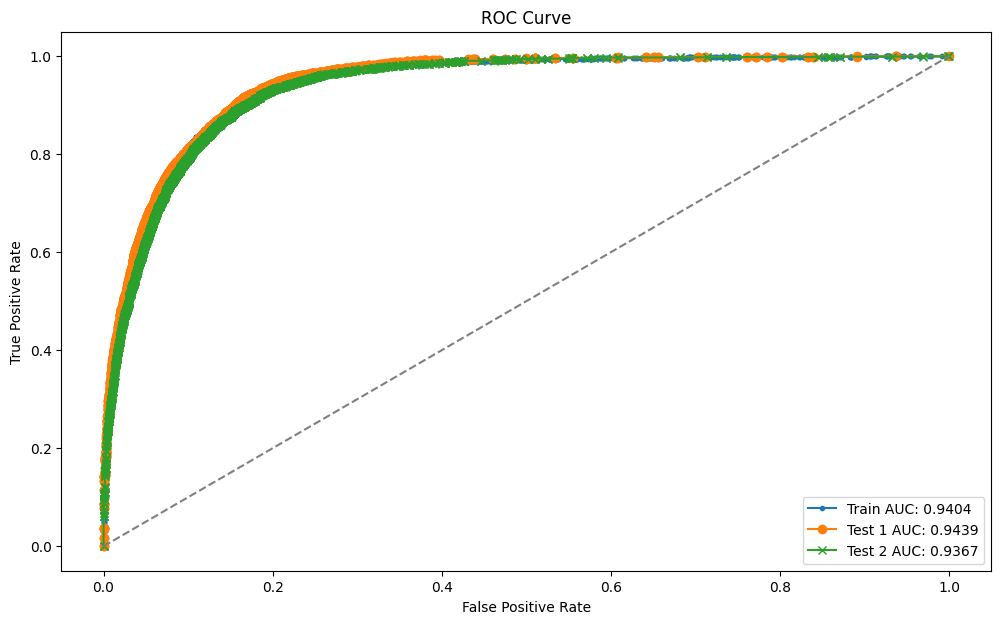

In [100]:
roc_score_auc_curve_nn(nn_final, X_train, y_train, X_test1, y_test1, X_test2, y_test2)

### Score Bins

1956/1956 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
AUC on Train: 0.9403733389882337
AUC on Test 1: 0.9439094343172751
AUC on Test 2: 0.93673350578398


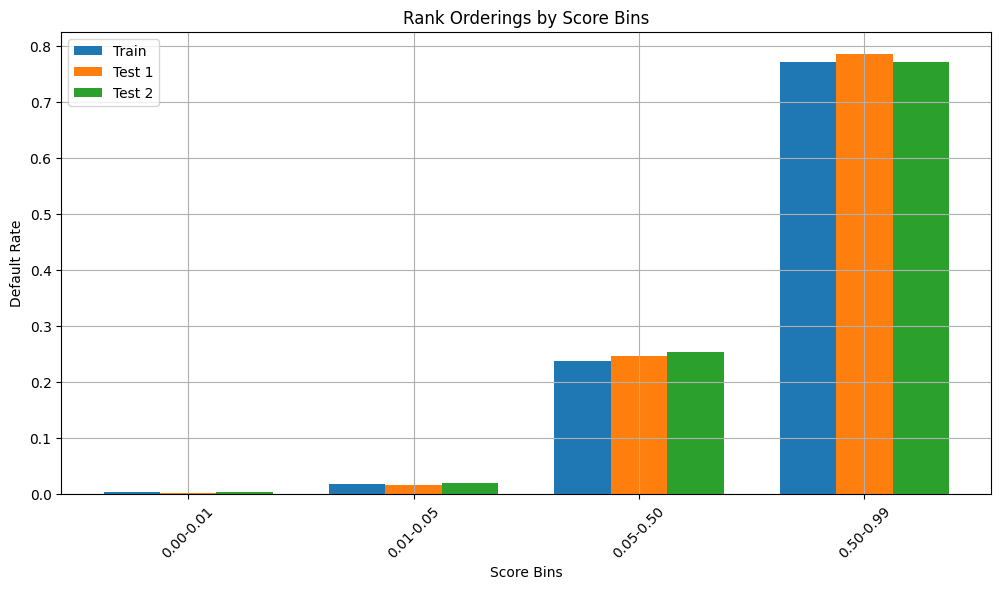

In [101]:
# Calculate AUC on each sample
y_train_pred = nn_final.predict(X_train)
y_test1_pred = nn_final.predict(X_test1)
y_test2_pred = nn_final.predict(X_test2)

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test1 = roc_auc_score(y_test1, y_test1_pred)
auc_test2 = roc_auc_score(y_test2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = y_train_pred.reshape(-1)
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# Calculate the value ranges for each bin
bin_ranges = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Apply the same thresholds to test samples
test1_scores = y_test1_pred.reshape(-1)
test2_scores = y_test2_pred.reshape(-1)

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
    default_rates = []
    for i in range(len(bins) - 1):
        mask = (scores >= bins[i]) & (scores <= bins[i + 1])
        if np.sum(mask) > 0:
            default_rate = np.sum(y[mask]) / np.sum(mask)
            default_rates.append(default_rate)
        else:
            default_rates.append(0.0)
    return default_rates

default_rates_train = calculate_default_rate(train_scores, y_train)
default_rates_test1 = calculate_default_rate(test1_scores, y_test1)
default_rates_test2 = calculate_default_rate(test2_scores, y_test2)

x_indexes = np.arange(len(bin_ranges))

plt.figure(figsize=(12, 6))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, bin_ranges, rotation=45)  # Display bin ranges on the x-axis
plt.legend()
plt.grid(True)
plt.show()